In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_all_old = pd.read_excel('Data/data_2_samples_NEW.xlsx', index_col=0)
# Drop sample 1
data_all_old = data_all_old[data_all_old['sample']==0]
# Reneme coluns the same as in new data
data_all_old.drop(['sample', 'AGT_AGTR2'], axis=1, inplace=True)
data_all_old.rename(columns={'stage_agr': 'stage'}, inplace=True)
# Change order of columns (other order causes error in xgboost)
data_all_old = data_all_old[['gender', 'age', 'bmi', 'ao','activity', 
                             'smoking', 'male_heredity', 'stage']]
data_all_old.head()

,gender,age,bmi,ao,activity,smoking,male_heredity,stage
0,0,0,0,0,0,0,1,1
1,1,1,0,0,1,1,0,1
2,1,1,0,1,1,1,0,1
3,1,0,1,1,1,0,0,1
4,0,1,1,1,0,0,0,1


In [4]:
data_old = pd.read_csv('Data\data_decode_old.csv', index_col=0).drop('alcohol', axis=1)
data_old.head()

,gender,age,bmi,ao,activity,smoking,male_heredity,stage
index,,,,,,,,
1,1,1,0,1,1,1,0,1
2,1,0,1,1,1,0,1,1
3,0,1,0,1,1,1,0,1
4,0,1,0,0,1,0,1,0
5,1,1,1,1,0,1,1,1


In [5]:
data_new = pd.read_csv('Data\data_decode_new.csv', index_col=0).drop('alcohol', axis=1)
data_new.head()

,gender,age,bmi,ao,activity,smoking,male_heredity,stage
index,,,,,,,,
1,1,1,0,0,0,1,0,1
2,1,0,0,1,1,0,1,1
3,0,1,1,1,0,0,0,1
4,0,1,0,1,0,0,1,0
5,1,1,0,1,0,1,1,1


In [48]:
data_combine = pd.concat([data_old.assign(is_new=[0]*data_old.shape[0]),
                         data_new.assign(is_new=[1]*data_new.shape[0])], 
                         ignore_index=True)
data_combine.head()

,gender,age,bmi,ao,activity,smoking,male_heredity,stage,is_new
0,1,1,0,1,1,1,0,1,0
1,1,0,1,1,1,0,1,1,0
2,0,1,0,1,1,1,0,1,0
3,0,1,0,0,1,0,1,0,0
4,1,1,1,1,0,1,1,1,0


### Barplot of sick/health (285 examples)

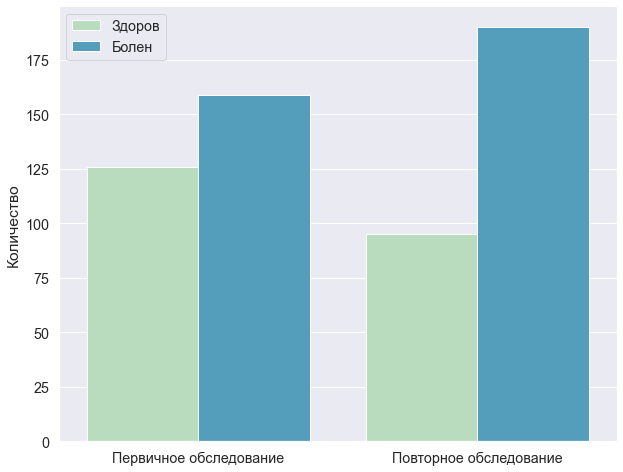

In [86]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.3)
sns.countplot(x='is_new', hue='stage', data=data_combine, palette='GnBu')
plt.xlabel('')
plt.ylabel('Количество')
plt.xticks([0, 1], ['Первичное обследование', 'Повторное обследование'])
plt.legend(('Здоров', 'Болен'))
plt.savefig('graphs/count_sick.png', edgecolor='none')
plt.show()

In [ ]:
### 